# Recitation 7: randomness

- Monte carlo sim
- regression

- **quiz stuff**
  - normal, uniform, exponential
  - histogram (normed)
  - confidence intervals
  - distributions
  - coeff of variation, mean, std., var
  - hashing
  - parameters to functions
  - double-under-bar methods
  - lambda functions
  - polymorphism vs. inheritance
  - exceptions: try/except
  - confidence intervals
  - monte carlo vs. brute force

In [7]:
import numpy as np
%matplotlib inline

In [8]:
%qtconsole

In [209]:
# monte carlo

# discuss: dtype of doorsA
doorsA = np.array(['goat', 'goat', 'prize'], 'U10')  # or S10
def isGoat(montyOpens=True, switch=True):
    randorder = np.random.permutation(3)
    tDoorsA = doorsA[randorder]
    choiceN=0
    if montyOpens:
        for iR in [1,2]:
            if tDoorsA[iR] == 'goat':
                tDoorsA[iR] = 'opened'
                break
    if switch:
        notOpened = np.where(tDoorsA!='opened') ##[0]
        switchTarg = np.setdiff1d(notOpened, choiceN)[0]
        #print(switchTarg)
        choiceN = switchTarg
    #print(tDoorsA[choiceN])
    if tDoorsA[choiceN] == 'goat':
        return(True)
    else:
        return(False)

isGoat()



True

In [390]:
#   %%timeit
# one simulation
nReps = 10000
goatV = np.nan*np.zeros((nReps,))

for iR in range(nReps):
    goatV[iR] = isGoat(montyOpens=True, switch=True)

1 loop, best of 3: 465 ms per loop


(array([ 685.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  315.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

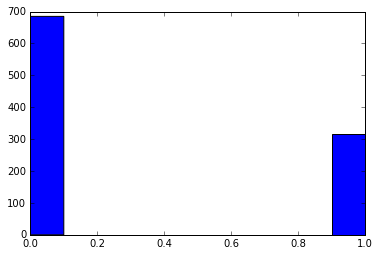

In [215]:
plt.hist(goatV)

In [216]:
# run for all combinations of open and switch
nReps = 10000
goatV = np.nan*np.zeros((nReps,))

openL = [True,True,False,False]
switchL = [True,False,True,False]
pctV = np.nan*np.zeros((4,))
for iP in range(len(pctV)):
    for iR in range(nReps):
        goatV[iR] = isGoat(montyOpens=openL[iP], switch=switchL[iP])
    pctV[iP] = np.sum(goatV)/len(goatV)

print(pctV)
#plt.hist(goatV, cumulative=True)


[ 0.315  0.667  0.687  0.66 ]


In [207]:
# show pdb in console: use to debug the choiceN vector in the cell above
import pdb; pdb.pm()

> <ipython-input-190-5e098a80c5f5>(18)isGoat()
-> if tDoorsA[choiceN] == 'goat':
(Pdb) choiceN
array([1, 2])
(Pdb) q


In [380]:
# monte carlo with vectors
goat = 0
opened = np.nan
prize = 1
a_ = np.array

nReps = 10
doorMat = np.tile(a_([0,1,1], 'f8'), reps=[nReps,1])
print(doorMat)
shuffleNs = np.vstack([np.random.permutation(3) for x in range(nReps)])
print(shuffleNs)
doorMat = np.take(doorMat, shuffleNs)
print(doorMat)

[[ 0.  1.  1.]
 [ 0.  1.  1.]
 [ 0.  1.  1.]
 [ 0.  1.  1.]
 [ 0.  1.  1.]
 [ 0.  1.  1.]
 [ 0.  1.  1.]
 [ 0.  1.  1.]
 [ 0.  1.  1.]
 [ 0.  1.  1.]]
[[2 0 1]
 [1 2 0]
 [1 0 2]
 [1 2 0]
 [0 2 1]
 [0 1 2]
 [2 0 1]
 [1 0 2]
 [1 2 0]
 [1 0 2]]
[[ 1.  0.  1.]
 [ 1.  1.  0.]
 [ 1.  0.  1.]
 [ 1.  1.  0.]
 [ 0.  1.  1.]
 [ 0.  1.  1.]
 [ 1.  0.  1.]
 [ 1.  0.  1.]
 [ 1.  1.  0.]
 [ 1.  0.  1.]]


In [381]:
# np.nonzero returns tuple
np.nonzero(doorMat[:,1:]==1)

(array([0, 1, 2, 3, 4, 4, 5, 5, 6, 7, 8, 9]),
 array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1]))

In [382]:
# do open
openXY = np.nonzero(doorMat[:,1:]==1)

#  np.unique(return_index=True): returns tuple
np.unique(openXY[0], return_index=True)

desNs=np.unique(openXY[0], return_index=True)[1]
print(desNs)
openN = openXY[1][desNs]+1
print(openN)

doorMat2 = doorMat.copy()
doorMat2[openXY[0][desNs],openN] = np.nan
print(doorMat2)

[ 0  1  2  3  4  6  8  9 10 11]
[2 1 2 1 1 1 2 2 1 2]
[[  1.   0.  nan]
 [  1.  nan   0.]
 [  1.   0.  nan]
 [  1.  nan   0.]
 [  0.  nan   1.]
 [  0.  nan   1.]
 [  1.   0.  nan]
 [  1.   0.  nan]
 [  1.  nan   0.]
 [  1.   0.  nan]]


In [383]:
# do switch 
print(~np.isnan(doorMat2[:,1:]))
#print(np.nonzero(~np.isnan(doorMat2[:,1:])))
#print(np.nonzero(~np.isnan(doorMat2[:,1:]))[1])

switchToNs = np.nonzero(~np.isnan(doorMat2[:,1:]))[1]+1
print(switchToNs)
doorMat2[switchToNs,:]

goatV = np.choose(switchToNs, doorMat2.T)
np.sum(goatV)/len(goatV)


[[ True False]
 [False  True]
 [ True False]
 [False  True]
 [False  True]
 [False  True]
 [ True False]
 [ True False]
 [False  True]
 [ True False]]
[1 2 1 2 2 2 1 1 2 1]


0.20000000000000001

In [391]:
## %%timeit
# monte carlo with vectors
# full code


nReps = 10000
doorMat = np.tile(a_([0,1,1], 'f8'), reps=[nReps,1])
shuffleNs = np.vstack([np.random.permutation(3) for x in range(nReps)])
doorMat = np.take(doorMat, shuffleNs)

# open
openXY = np.nonzero(doorMat[:,1:]==1)
np.unique(openXY[0], return_index=True)
desNs=np.unique(openXY[0], return_index=True)[1]
openN = openXY[1][desNs]+1
doorMat2 = doorMat.copy()
doorMat2[openXY[0][desNs],openN] = np.nan

# switch
switchToNs = np.nonzero(~np.isnan(doorMat2[:,1:]))[1]+1
doorMat2[switchToNs,:]

# calc
goatV = np.choose(switchToNs, doorMat2.T)
np.sum(goatV)/len(goatV)

0.33610000000000001

# simple regression


In [452]:
# load data
import scipy.io
m0 = scipy.io.loadmat('./data2-i1114-161031.mat')

input = m0['input']
reactTimesV = np.hstack([x[0][0] for x in input['reactTimesMs'][0][0][0]])
print(reactTimesV)

tGratingContrast = np.hstack([x[0][0] for x in input['tGratingContrast'][0][0][0]])
trialOutcome = np.hstack([x[0] for x in input['trialOutcomeCell'][0][0][0]])
successIx = trialOutcome == 'success'



#print(1)

[  549   549  -125  -804   549   549   549   550   549   549   549   550
   549 -2762   549   550   550 -1667   549   549   550   549   550   549
  -555 -1020   549   549   550   549   550   549  -748   549   550   549
   549   549   549 -1301   549   550   333   549  -500   247   549   238
  -547   252   277    -9   391   550   418  -226   260   315  -580   549
   549   549  -452   549   550  -130   278   320   302  -680   549   550
 -1135   549   550   550  -608   549   301   112   -76 -1116   282   371
   211  -545   292   273   257   209  -384   302  -177   235   265 -1163
   233   549   243   269   359 -1147   424   234   174   191  -459   309
   183   277   266   237  -190 -1196   550 -1003   549   263   228   213
   193   285  -581   325   266   303   257   291 -1072   368   234 -1675
   317   219   237  -459   236   255  -392 -1792   549   233   346 -1830
   323  -843 -2230   272  -555   414   337 -1676   364   231   230  -395
   320   443 -1403   421    98   245  -584   269   

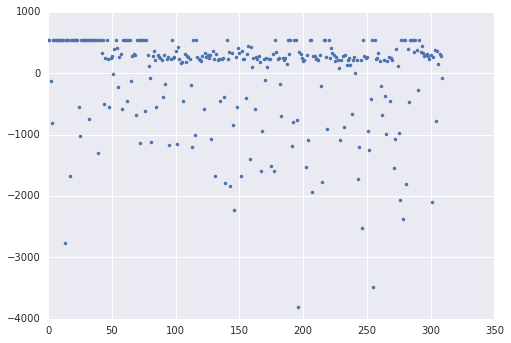

In [450]:
import seaborn as sns
plt.plot(reactTimesV, '.')

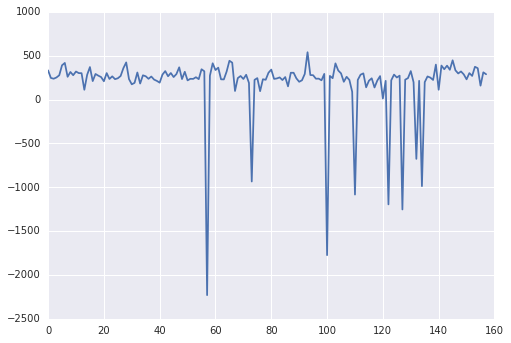

In [453]:
plt.plot(reactTimesV[successIx])

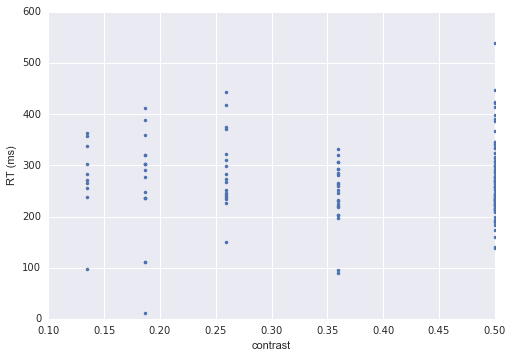

In [455]:
desIx = (successIx) & (reactTimesV > 0)
plt.plot(tGratingContrast[desIx], reactTimesV[desIx], '.')
plt.xlabel('contrast')
plt.ylabel('RT (ms)')

In [459]:
import scipy.stats
xs = tGratingContrast[desIx]
ys = reactTimesV[desIx]
res = scipy.stats.linregress(xs,ys)

print(res.rvalue**2)
print(res)


0.000117038864666
LinregressResult(slope=-6.0594820748291101, intercept=270.99138421754543, rvalue=-0.010818450197030507, pvalue=0.89546375710813342, stderr=46.037759632271246)


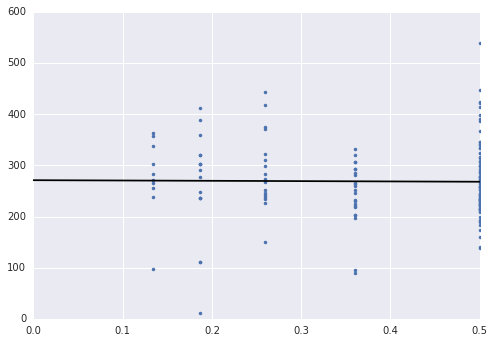

In [462]:
plt.plot(xs,ys,'.')
xs0 = np.linspace(0,0.5,100)
plt.plot(xs0, xs0*res.slope+res.intercept, 'k')